In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from matplotlib import container

In [2]:
data_folder = r"E:\data\dao-0214\V4_4\Supervision"
hierarchy_performance_file = data_folder + r"\hierarchy_performance_across_p1"
superior_performance_file = data_folder + r"\superior_performance_across_p1"
hierarchy_diversity_file = data_folder + r"\hierarchy_diversity_across_p1"
hierarchy_variance_file = data_folder + r"\hierarchy_variance_across_p1"
hierarchy_percentile_10_file = data_folder + r"\hierarchy_percentile_10_across_p1"
hierarchy_percentile_90_file = data_folder + r"\hierarchy_percentile_90_across_p1"
dao_performance_file = "E:\data\dao-0214\V3\DHA\dao_performance"

with open(hierarchy_performance_file, 'rb') as infile:
    hierarchy_performance = pickle.load(infile)
with open(hierarchy_diversity_file, 'rb') as infile:
    hierarchy_diversity = pickle.load(infile)
with open(superior_performance_file, 'rb') as infile:
    superior_performance = pickle.load(infile)
with open(hierarchy_variance_file, 'rb') as infile:
    hierarchy_variance = pickle.load(infile)
with open(hierarchy_percentile_10_file, 'rb') as infile:
    hierarchy_percentile_10 = pickle.load(infile)
with open(hierarchy_percentile_90_file, 'rb') as infile:
    hierarchy_percentile_90 = pickle.load(infile)
with open(dao_performance_file, 'rb') as infile:
    dao_performance = pickle.load(infile)

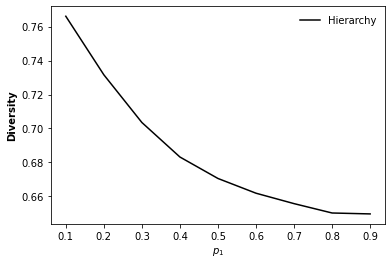

<Figure size 432x288 with 0 Axes>

In [3]:
# Performance
x =  np.arange(0.1, 1.0, 0.1)
# print(hierarchy_performance)
# plt.plot(x, hierarchy_percentile_10, "k--", label="10th Percentile")
plt.plot(x, hierarchy_performance, "k-", label="Hierarchy")
# plt.plot(x, hierarchy_percentile_90, "k-.", label="90th Percentile")
plt.xlabel('$p_1$', fontweight='bold', fontsize=10)
plt.ylabel('Diversity', fontweight='bold', fontsize=10)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=10)
plt.savefig(data_folder + r"\Supervision_performance.png", transparent=False, dpi=200)
plt.show()
plt.clf()

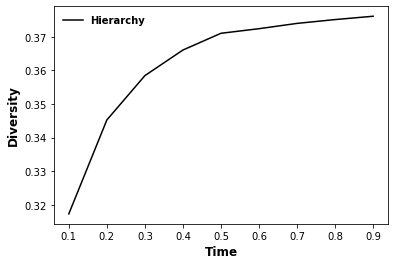

<Figure size 432x288 with 0 Axes>

In [4]:
# Diversity
x =  np.arange(0.1, 1.0, 0.1)
legend_properties = {'weight':'bold'}
plt.plot(x, hierarchy_diversity, "k-", label="Hierarchy")
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Diversity', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
plt.savefig(data_folder + r"\Supervision_diversity.png", transparent=False, dpi=200)
plt.show()
plt.clf()

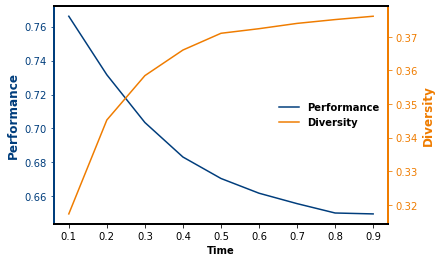

<Figure size 432x288 with 0 Axes>

In [5]:
# Twin
x =  np.arange(0.1, 1.0, 0.1)
nusblue = "#003D7C"
nusorange = "#EF7C00"
legend_properties = {'weight':'bold'}

fig,ax1 = plt.subplots()
ax1.set_xlabel("Time", fontweight='bold', fontsize = 10)
ax1.set_ylabel("Performance", fontweight='bold', color="black", fontsize=12)

ax2=ax1.twinx()
ax2.set_ylabel("Diversity", fontweight='bold', color="black", fontsize=12)

ax2.spines['left'].set_color(nusblue)
ax2.spines["left"].set_linewidth(2)
ax2.spines['right'].set_color(nusorange)
ax2.spines["right"].set_linewidth(2)
ax2.spines["top"].set_linewidth(2)
ax2.spines["bottom"].set_linewidth(2)
ax2.yaxis.label.set_color(nusorange)
ax2.tick_params(axis='y', colors=nusorange)

ax1.yaxis.label.set_color(nusblue)
ax1.tick_params(axis='y', colors=nusblue)

line_1 = ax1.plot(x, hierarchy_performance, "k-", color=nusblue, label="Performance")

line_2 = ax2.plot(x, hierarchy_diversity, "k-", color= nusorange, label="Diversity")

lines_1 = line_1 + line_2
labs_1 = [l.get_label() for l in lines_1]
ax1.legend(lines_1, labs_1, frameon=False, fontsize=12, loc="center right",  ncol=1, prop=legend_properties)

# lines_2 = line_2
# labs_2 = [l.get_label() for l in lines_2]

# ax2.legend(lines_2, labs_2, frameon=False, fontsize=12, loc=(0, 1.05),  ncol=3, prop=legend_properties)

plt.savefig(data_folder + r"\Supervision_performance_diversity.png", transparent=True, dpi=200, bbox_inches='tight')
plt.show()
plt.clf()